# Tutorial: Generating Numerical Relativity (NR) injections and other core functionalities of the GWMAT's `nr_injection` module.

In [2]:
#!/home/anuj.mishra/anaconda3/envs/igwn-py39/bin/python3

import numpy as np
from time import time

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.figsize'] = (7.0, 5.0)
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 18
mpl.rcParams['xtick.labelsize'] = 20.0
mpl.rcParams['ytick.labelsize'] = 20.0
mpl.rcParams['lines.markersize'] = 10.0
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern'

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import gwmat
from gwmat import nr_injection
nr_inj = nr_injection.NRInjection()

## 1. Documentation

In [3]:
help(nr_injection)

Help on module gwmat.nr_injection in gwmat:

NAME
    gwmat.nr_injection

DESCRIPTION
    This module defines the `NRInjection` class, which provides functions 
    for generating injection frame files from SXS Numerical Relativity (NR) 
    simulations of gravitational wave signals from Compact Binary Coalescences (CBCs).
    
    The class relies on the official SXS module and primarily utilizes `nr-catalog-tools`. 
    For installation, the specific version of `nr-catalog-tools` used is:
    https://github.com/anuj137/nr-catalog-tools/tree/bugfix_remove_junk.

CLASSES
    builtins.object
        NRInjection
    
    class NRInjection(builtins.object)
     |  Class for generating injection frame files for SXS Numerical Relativity (NR)
     |  simulations of gravitational wave signals from
     |  Compact Binary Coalescences (CBCs).
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  

## 2. Visualization of the Parameter Space Covered by SXS Simulations 

Obtaining the dataframe containing metadata of SXS simulations

In [4]:
# a modified sxs dataframe that also includes chi_p and info about minimum total mass for fstarts={10,13.33,20} Hz.
sxs_simulations_df = nr_inj.get_sxs_dataframe() # can also be accessed as self.sxs_simulations_dataframe
sxs_simulations_df

Loading SXS data from cache directory: /home/anuj.mishra/.cache/sxs/catalog.json


/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/sxs/catalog/catalog.py:64: UserWarning: 

        You have called a function that uses the `Catalog` class,
        which, as of `sxs` version 2024.0.0, has been deprecated in
        favor of the `Simulations` interface.  See the documentation
        for more information.
        
  warn(deprecation_notice)


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer


object_types  initial_separation  initial_orbital_frequency  \
SXS:BBH:0001          BHBH               18.00                   0.012203   
SXS:BBH:0002          BHBH               19.00                   0.011292   
SXS:BBH:0003          BHBH               19.00                   0.011284   
SXS:BBH:0004          BHBH               19.00                   0.011313   
SXS:BBH:0005          BHBH               18.00                   0.012168   
...                    ...                 ...                        ...   
SXS:BHNS:0003         BHNS               51.43                   0.005595   
SXS:BHNS:0004         BHNS               39.20                   0.006233   
SXS:BHNS:0005         BHNS               39.20                   0.006235   
SXS:BHNS:0006         BHNS               52.50                   0.004524   
SXS:BHNS:0007         BHNS               56.00                   0.004454   

               initial_adot  initial_ADM_energy  \
SXS:BBH:0001      -0.000025            0.993736   
SXS:BBH:0002      -0.000021            0.994031   
SXS:BBH:0003      -0.000019            0.994277   
SXS:BBH:0004      -0.000028            0.994314   
SXS:BBH:0005      -0.000016            0.993947   
...                     ...                 ...   
SXS:BHNS:0003      0.000000            5.400000   
SXS:BHNS:0004     -0.000022            2.778112   
SXS:BHNS:0005     -0.000025            2.780039   
SXS:BHNS:0006     -0.000012            3.475229   
SXS:BHNS:0007     -0.000015            4.171456   

                                     initial_ADM_linear_momentum  \
SXS:BBH:0001       [7.5160071e-09, 2.4389069e-09, -5.798632e-10]   
SXS:BBH:0002     [1.6810827e-09, 1.4244131e-09, -1.14839759e-08]   
SXS:BBH:0003   [2.599703e-09, -4.1239227e-09, 6.03918869017e-05]   
SXS:BBH:0004       [-2.7524803e-09, 5.883293e-09, 5.3376578e-09]   
SXS:BBH:0005      [-3.7413651e-09, -2.4006761e-09, 7.874335e-10]   
...                                                          ...   
SXS:BHNS:0003                                    [0.0, 0.0, 0.0]   
SXS:BHNS:0004  [-1.2457454507e-06, 5.44427247228e-06, -6.2716...   
SXS:BHNS:0005  [2.981054730059816e-06, -1.22406716840395e-06,...   
SXS:BHNS:0006  [-3.413420373258928e-06, -2.0768413414982537e-...   
SXS:BHNS:0007  [4.867002495810236e-07, -1.5158476150901928e-0...   

               initial_ADM_linear_momentum_mag  \
SXS:BBH:0001                      7.923059e-09   
SXS:BBH:0002                      1.169345e-08   
SXS:BBH:0003                      6.039189e-05   
SXS:BBH:0004                      8.407132e-09   
SXS:BBH:0005                      4.514544e-09   
...                                        ...   
SXS:BHNS:0003                     0.000000e+00   
SXS:BHNS:0004                     5.620082e-06   
SXS:BHNS:0005                     3.222581e-06   
SXS:BHNS:0006                     3.995587e-06   
SXS:BHNS:0007                     1.516629e-05   

                                    initial_ADM_angular_momentum  \
SXS:BBH:0001   [4.27581822e-08, -2.342625073e-07, 1.184715566...   
SXS:BBH:0002   [2.7620419806e-06, -2.4287931932e-06, 1.210130...   
SXS:BBH:0003   [0.1251774015530911, -0.0006755685628109, 1.21...   
SXS:BBH:0004   [8.163645183e-07, 7.736321355e-07, 1.094457487...   
SXS:BBH:0005   [9.790607752e-07, 1.026494432e-07, 1.300909689...   
...                                                          ...   
SXS:BHNS:0003                      [0.0, 0.0, 16.60638426824671]   
SXS:BHNS:0004                      [0.0, 0.0, 8.447059816549256]   
SXS:BHNS:0005                      [0.0, 0.0, 8.111755992167552]   
SXS:BHNS:0006                     [0.0, 0.0, 12.993342233650518]   
SXS:BHNS:0007                      [0.0, 0.0, 16.29283505660932]   

               initial_ADM_angular_momentum_mag  initial_mass1  ...  \
SXS:BBH:0001                           1.184716        0.50000  ...   
SXS:BBH:0002                           1.210131        0.50000  ...   
SXS:BBH:0003                

Plot

/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-pack

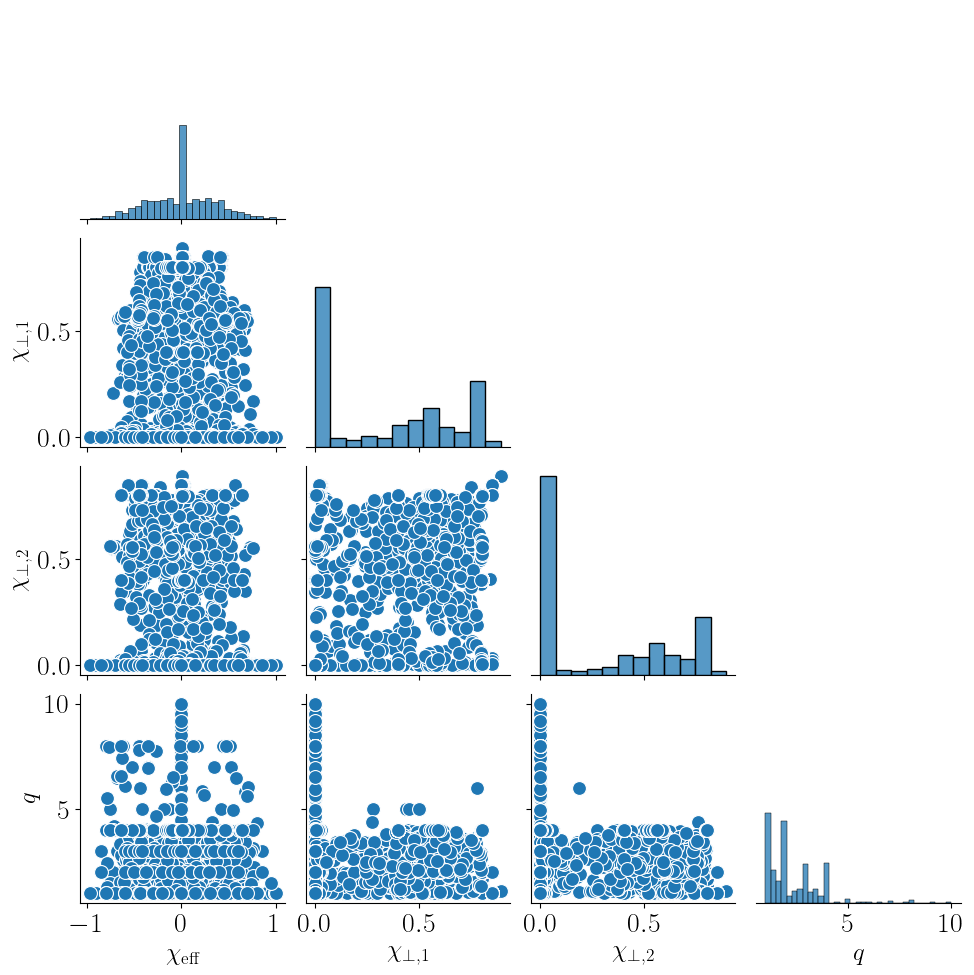

In [5]:
import seaborn as sns

bbh_df = sxs_simulations_df[sxs_simulations_df["object_types"] == "BHBH"]

pp = sns.pairplot(
    bbh_df[["reference_chi_eff", "reference_chi1_perp", "reference_chi2_perp", "reference_mass_ratio"]].dropna(),
    corner=True,
)
pp.y_vars = [r"$\chi_{\mathrm{eff}}$", r"$\chi_{\perp,1}$", r"$\chi_{\perp,2}$", r"$q$"]
pp.x_vars = pp.y_vars
pp._add_axis_labels()

## 3. Generating h_plus and h_cross polarizations for an NR simulation 
we choose `"SXS:BBH:0001"` as an example

Loading the `nrcatalogtools.sxs.SXSCatalog` object from cache directory: /home/anuj.mishra/.cache/sxs/nrcatalogtools_sxscatalog.pkl


/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/sxs/catalog/catalog.py:64: UserWarning: 

        You have called a function that uses the `Catalog` class,
        which, as of `sxs` version 2024.0.0, has been deprecated in
        favor of the `Simulations` interface.  See the documentation
        for more information.
        
  warn(deprecation_notice)


Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/sxs/waveforms/format_handlers/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Computing reference time..
Reference time not found in waveform h5 file.
Removing junk
/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/waveformtools
No module named 'config'

Output of `generate_nr_gw_polarizations_hp_hc`:
hp : <pycbc.types.timeseries.TimeSeries object at 0x7f77c745b640>
hc : <pycbc.types.timeseries.TimeSeries object at 0x7f77c745bb50>




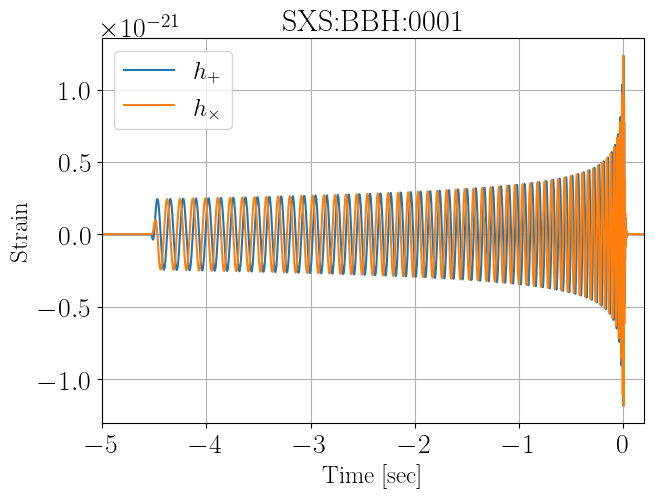

In [6]:
nr_wf_gen_params = dict(simulation_name=None, simulation_id=None, 
                        total_mass=None, luminosity_distance=None, inclination=0, 
                        coa_phase=0, ra=0., dec=0., polarization=0., 
                        trigger_time=0, sample_rate=4096, f_ref=None,
                        t_ref=None, k=3, kind=None, tol=1e-6, 
                        )
lens_params = dict(m_lens=0, y_lens=5)
misc_params = dict(remove_junk=True, taper_hp_hc=True, hp_hc_extra_padding_at_start=8,
                   make_hp_hc_duration_power_of_2=True)            
params = {**nr_wf_gen_params, **lens_params, **misc_params}

## Generating Waveform
# params.update(simulation_id=0, total_mass=100, luminosity_distance=1000)
params.update(simulation_name="SXS:BBH:0001", total_mass=100, luminosity_distance=1000)
wfs_res = nr_inj.generate_nr_gw_polarizations_hp_hc(**params)
print("\nOutput of `generate_nr_gw_polarizations_hp_hc`:")
gwmat.general_utils.print_dict(wfs_res)
print("\n")

# Plot
wf = wfs_res['hp']
plt.plot(wf.sample_times, wf, linestyle='-', label='$h_+$')
wf = wfs_res['hc']
plt.plot(wf.sample_times, wf, linestyle='-', label=r'$h_\times$')
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.title(nr_inj.sxs_wf_modes.metadata["alternative_names"])
plt.xlim(-5, 0.2)
plt.grid()
plt.show()

#### Metadata of the corresponding SXS simulation

In [7]:
nr_inj.sxs_wf_modes.metadata

Metadata([('url', 'https://doi.org/10.5281/zenodo.1212426'),
          ('simulation_name', 'd18.0_q1.0_s0_0_0_s0_0_0/Lev5'),
          ('alternative_names', 'SXS:BBH:0001'),
          ('initial_data_type', 'BBH_CFMS'),
          ('object_types', 'BHBH'),
          ('number_of_orbits', 28.1190834141),
          ('reference_mass_ratio', 0.9999999899440033),
          ('reference_chi_eff', 1.2156391861217613e-07),
          ('reference_chi1_perp', 9.733308972643856e-10),
          ('reference_chi2_perp', 1.4299394525915949e-09),
          ('reference_eccentricity', 0.0002569),
          ('reference_dimensionless_spin1',
           [7.09752141352e-10, -6.66051760901e-10, 1.20930921804e-07]),
          ('reference_dimensionless_spin2',
           [5.84453420303e-10, 1.30504445113e-09, 1.22196915414e-07]),
          ('reference_orbital_frequency',
           [2.82808523611e-13, -8.25159171205e-13, 0.0122754056311]),
          ('reference_mass1', 0.500000161328),
          ('reference_mass2',

## 4. Generating NR injection frame files and related data.
- Note that for a given NR simulation, one has freedom in choosing only the `extrinsic parameters`
and the `total_mass` to obtain the projected signals in interferometers.
- We will use `gwmat.nr_inj.simulate_nr_injection_with_comprehensive_output`, which produces all the relavant output.
- Below we show all the outputs and their visualization.

In [8]:
nr_wf_gen_params = dict(simulation_name=None, simulation_id=None, 
                        total_mass=None, luminosity_distance=None, inclination=0, 
                        coa_phase=0, ra=0., dec=0.7, polarization=0., 
                        trigger_time=1126259462.419288, sample_rate=4096, f_ref=None,
                        t_ref=None, k=3, kind=None, tol=1e-6,
                        )
misc_params = dict(remove_junk=True, taper_hp_hc=True, hp_hc_extra_padding_at_start=8, 
                   make_hp_hc_duration_power_of_2=True, 
                   extra_padding_at_start=1, extra_padding_at_end=2, save_data=False, 
                   data_outdir = './', data_label=None, data_channel='PyCBC-Injection')            
detector_params = dict(ifo_list=["H1", "L1", "V1"], snr_f_min=20, snr_f_max=None,
                       Noise=True, psd_H1="O4", psd_L1="O4", psd_V1="O4", noise_seed=127)
params = {**nr_wf_gen_params, **misc_params, **detector_params}

# params.update(simulation_id=10, total_mass=100, luminosity_distance=1000)
params.update(simulation_name="SXS:BBH:0001", total_mass=100, luminosity_distance=1000)
wfs_res = nr_inj.simulate_nr_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_nr_injection_with_comprehensive_output`:")
gwmat.general_utils.print_dict(wfs_res)
print("\n")

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Computing reference time..
Reference time not found in waveform h5 file.
Removing junk

Output of `simulate_nr_injection_with_comprehensive_output`:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0ae59a0>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0ae5c40>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0af9130>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0ae5040>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0ae5130>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f09d6c40>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0ae5820>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f09d6fd0>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object

### (i) Pure_polarized_wfs

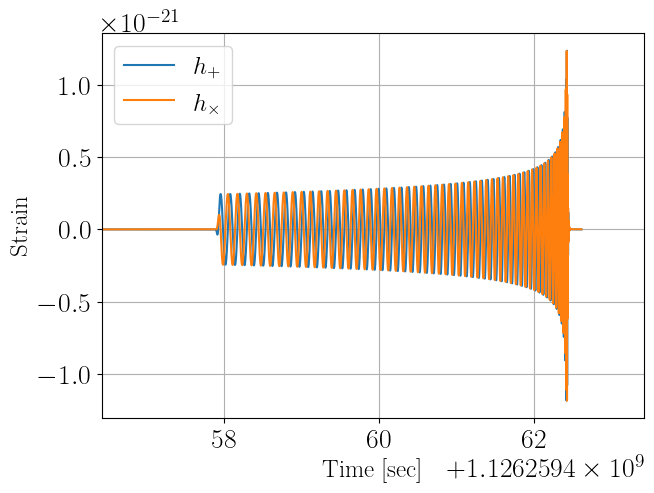

In [9]:
wf = wfs_res["pure_polarized_wfs"]["hp"]
plt.plot(wf.sample_times, wf, linestyle='-', label='$h_+$')
wf = wfs_res["pure_polarized_wfs"]["hc"]
plt.plot(wf.sample_times, wf, linestyle='-', label=r'$h_\times$')
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
plt.show()

### (ii) Zero-noise interferometer signal (`pure_ifo_signal`)

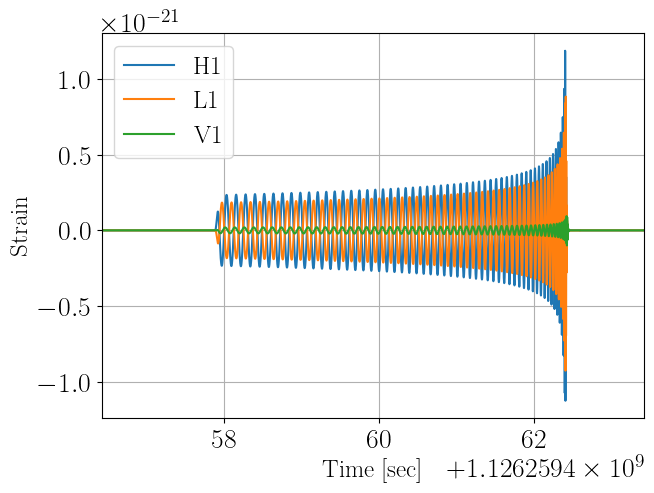

In [10]:
for ifo in params["ifo_list"]:
    wf = wfs_res["pure_ifo_signal"][ifo]
    plt.plot(wf.sample_times, wf, linestyle='-', label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
plt.show()

### (iii) Signal with Noise

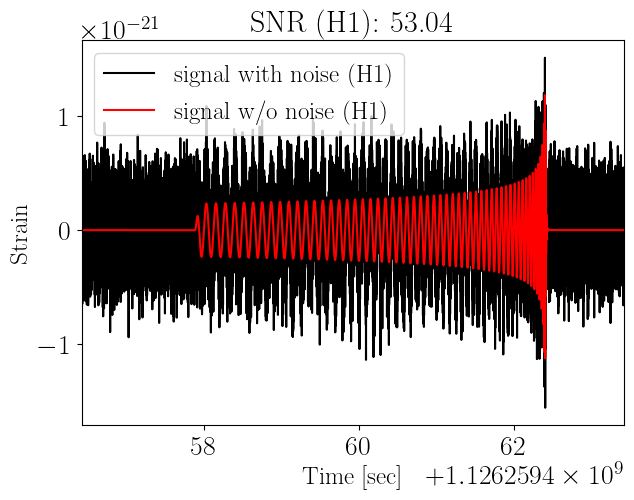

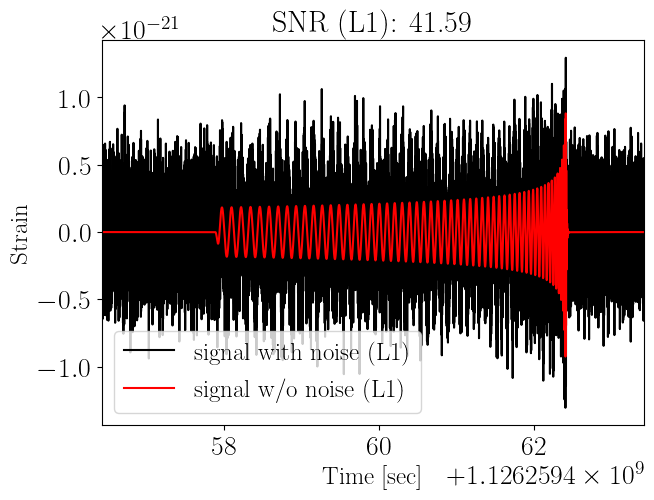

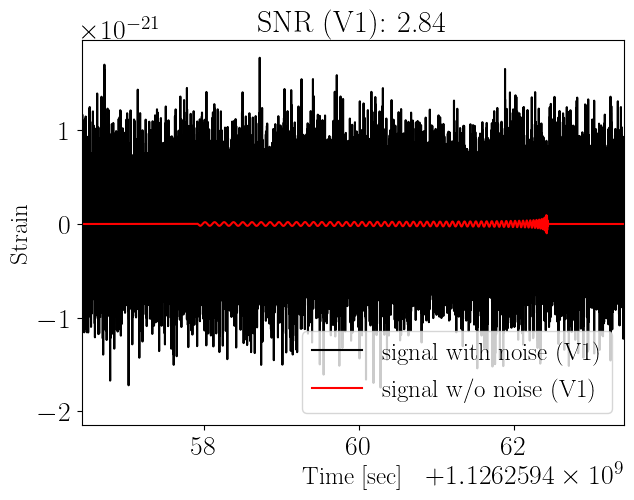

Net SNR: 67.46


In [11]:
for ifo in params['ifo_list']:
    wf_with_noise = wfs_res['noisy_ifo_signal'][ifo]
    wf_without_noise = wfs_res['pure_ifo_signal'][ifo] 
    snr_ifo = wfs_res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
    plt.show()

net_SNR = wfs_res['network_optimal_snr']
print('Net SNR: {:.2f}'.format(net_SNR))

### (iv) Matched Filter SNR

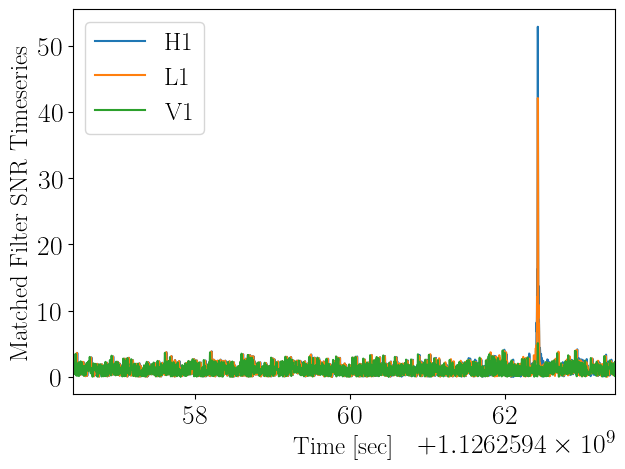

In [12]:
for ifo in params['ifo_list']:
    wf = wfs_res['matched_filter_snr_timeseries'][ifo]
    plt.plot(wf.sample_times, np.abs(wf), label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Matched Filter SNR Timeseries')    
plt.legend()    
plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
plt.show()    

### (v) get the full input parameters dict using `nr_inj.nr_inj_params`

In [13]:
nr_inj.nr_inj_params

{'simulation_name': 'SXS:BBH:0001',
 'simulation_id': None,
 'total_mass': 100,
 'ra': 0.0,
 'dec': 0.7,
 'sample_rate': 4096,
 'delta_t': 0.000244140625,
 'f_ref': None,
 't_ref': None,
 'k': 3,
 'kind': None,
 'tol': 1e-06,
 'remove_junk': True,
 'ifo_list': ['H1', 'L1', 'V1'],
 'snr_f_min': 20,
 'snr_f_max': None,
 'rwrap': 0.0,
 'taper_hp_hc': True,
 'hp_hc_extra_padding_at_start': 8,
 'make_hp_hc_duration_power_of_2': True,
 'extra_padding_at_start': 1,
 'extra_padding_at_end': 2,
 'Noise': True,
 'psd_H1': 'O4',
 'psd_L1': 'O4',
 'psd_V1': 'O4',
 'noise_seed': 127,
 'is_asd_file': False,
 'psd_f_low': 20,
 'save_data': False,
 'data_outdir': './',
 'data_label': None,
 'data_channel': 'PyCBC-Injection',
 'cyclic_time_shift_method': 'gwmat',
 'm_lens': 0.0,
 'y_lens': 5.0,
 'z_lens': 0.0,
 'lens_mass_lower_limit': 0.001,
 'Ff_data': None,
 'luminosity_distance': 1000,
 'inclination': 0,
 'coa_phase': 0,
 'polarization': 0.0,
 'trigger_time': 1126259462.419288,
 'iota': 0,
 'mass1'

### (vi) Saving the injection data as frame files.

In [14]:
params.update(save_data=True, data_label=params["simulation_name"].replace(":", "-"))
wfs_res = nr_inj.simulate_nr_injection_with_comprehensive_output(**params)

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Computing reference time..
Reference time not found in waveform h5 file.
Removing junk
Saving H1 data: ./H-H1_PyCBC-Injection-1126259433-32_SXS-BBH-0001.gwf
Saving L1 data: ./L-L1_PyCBC-Injection-1126259433-32_SXS-BBH-0001.gwf
Saving V1 data: ./V-V1_PyCBC-Injection-1126259433-32_SXS-BBH-0001.gwf


## 5.1 Generating NR injections with a specific network_optimal_snr value. 
Here, we will adjust the `luminosity_distance` to achieve a desired optiaml SNR of, say, 100.\
We do this in automated way using the function `nr_inj.network_optimal_snr_to_distance`.

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Computing reference time..
Reference time not found in waveform h5 file.
Removing junk
Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Computing reference time..
Reference time not found in waveform h5 file.
Removing junk

Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f7789aba310>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f7789aba1f0>}
pure_i

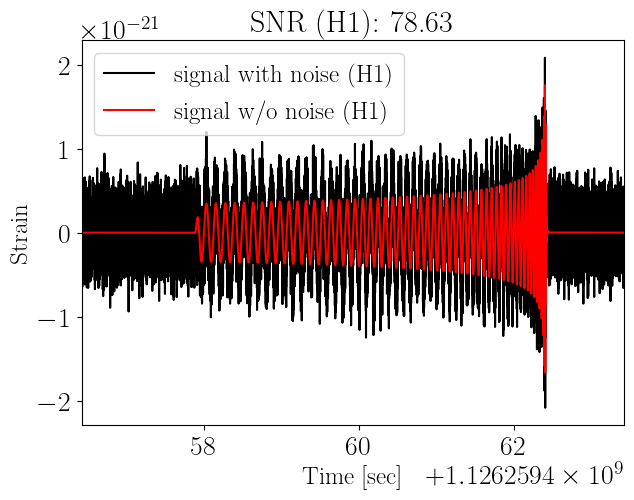

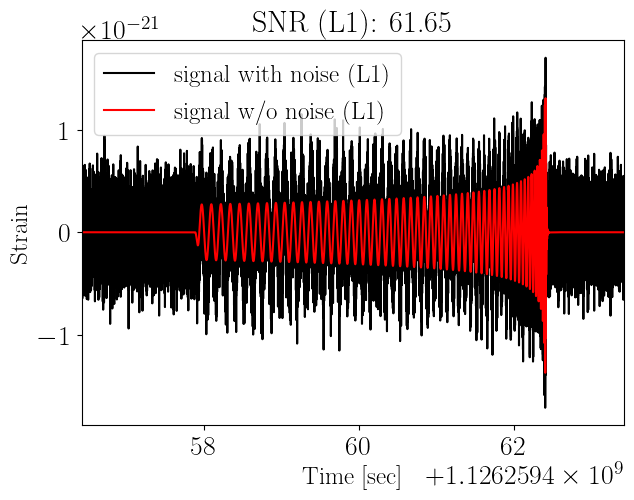

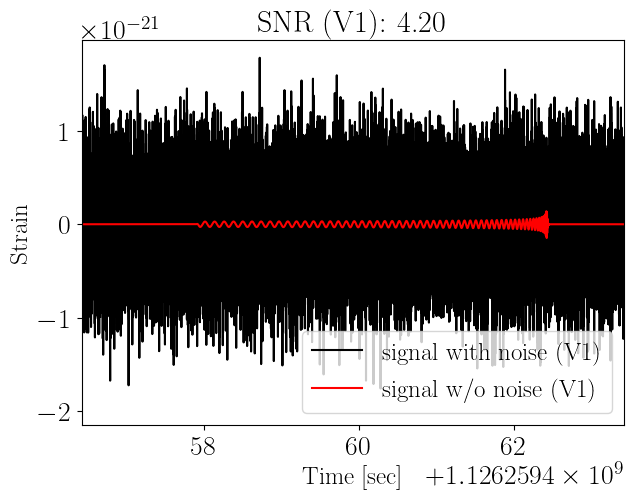

Network Optimal SNR: 100.00


In [15]:
# Computing the required distance to achieve a network SNR of 100.
params.update(save_data=False)
required_distance = nr_inj.network_optimal_snr_to_distance(net_optimal_snr=100, **params)
params.update(luminosity_distance=required_distance)

## WF generation
wfs_res = nr_inj.simulate_nr_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", wfs_res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(wfs_res)
print("\n")

# Plots
for ifo in params['ifo_list']:
    wf_with_noise = wfs_res['noisy_ifo_signal'][ifo]
    wf_without_noise = wfs_res['pure_ifo_signal'][ifo] 
    snr_ifo = wfs_res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
    plt.show()

net_SNR = wfs_res['network_optimal_snr']  
print('Network Optimal SNR: {:.2f}'.format(net_SNR))

## 5.2 Generating NR injections with a specific network_matched_filter_snr
Here, we will adjust the `luminosity_distance` to achieve a desired optiaml SNR of, say, 100.\
We do this in automated way using the function `nr_inj.network_matched_filter_snr_to_distance`.

Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Removing junk
Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Removing junk

Output of `simulate_injection_with_comprehensive_output`:

Keys: dict_keys(['pure_polarized_wfs', 'pure_ifo_signal', 'noisy_ifo_signal', 'psd', 'signal_templates', 'matched_filter_snr', 'optimal_snr', 'network_optimal_snr', 'matched_filter_snr_timeseries', 'network_matched_filter_snr'])

Output:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0a87700>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0a87be0>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0a87850>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0a87a00>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0a87df0>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f7760758550>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f7760753fd0>, 'V1': <pycbc.ty

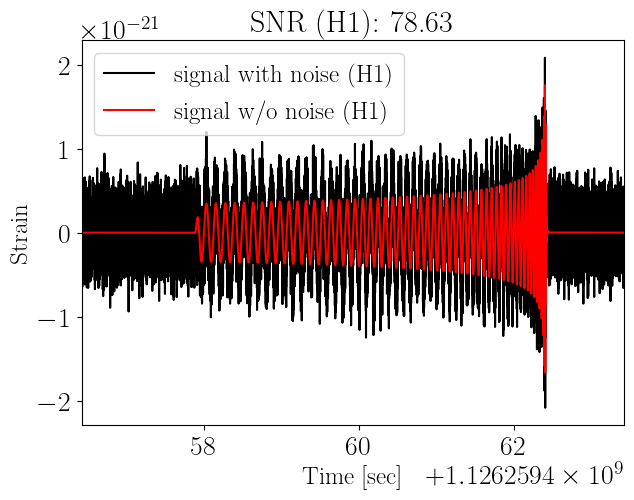

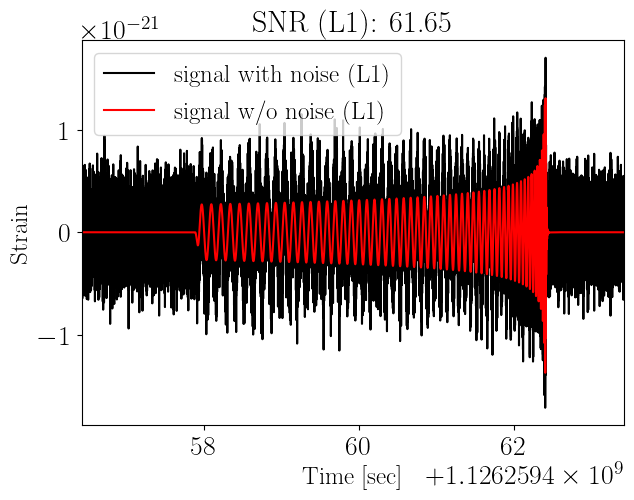

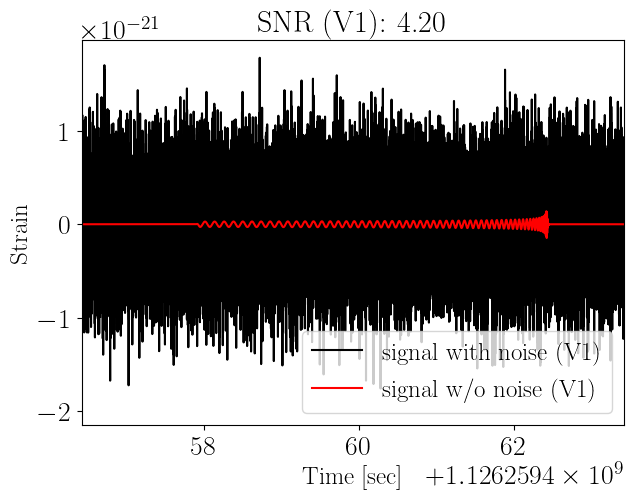

Network Matched-Filter SNR: 100.32


In [16]:
# Computing the required distance to achieve a network SNR of 100.
required_distance = nr_inj.network_matched_filter_snr_to_distance(net_mf_snr=100, threshold=1, **params)
params.update(luminosity_distance=required_distance)

## WF generation
wfs_res = nr_inj.simulate_nr_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_injection_with_comprehensive_output`:\n")
print("Keys:", wfs_res.keys())
print("\nOutput:")
gwmat.general_utils.print_dict(wfs_res)
print("\n")

# Plots
for ifo in params['ifo_list']:
    wf_with_noise = wfs_res['noisy_ifo_signal'][ifo]
    wf_without_noise = wfs_res['pure_ifo_signal'][ifo] 
    snr_ifo = wfs_res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
    plt.show()

net_SNR = wfs_res['network_matched_filter_snr']
print('Network Matched-Filter SNR: {:.2f}'.format(net_SNR))

In [17]:
nr_inj.nr_inj_params

{'simulation_name': 'SXS:BBH:0001',
 'simulation_id': None,
 'total_mass': 100,
 'ra': 0.0,
 'dec': 0.7,
 'sample_rate': 4096,
 'delta_t': 0.000244140625,
 'f_ref': None,
 't_ref': None,
 'k': 3,
 'kind': None,
 'tol': 1e-06,
 'remove_junk': True,
 'ifo_list': ['H1', 'L1', 'V1'],
 'snr_f_min': 20,
 'snr_f_max': None,
 'rwrap': 0.0,
 'taper_hp_hc': True,
 'hp_hc_extra_padding_at_start': 8,
 'make_hp_hc_duration_power_of_2': True,
 'extra_padding_at_start': 1,
 'extra_padding_at_end': 2,
 'Noise': True,
 'psd_H1': 'O4',
 'psd_L1': 'O4',
 'psd_V1': 'O4',
 'noise_seed': 127,
 'is_asd_file': False,
 'psd_f_low': 20,
 'save_data': False,
 'data_outdir': './',
 'data_label': 'SXS-BBH-0001',
 'data_channel': 'PyCBC-Injection',
 'cyclic_time_shift_method': 'gwmat',
 'm_lens': 0.0,
 'y_lens': 5.0,
 'z_lens': 0.0,
 'lens_mass_lower_limit': 0.001,
 'Ff_data': None,
 'luminosity_distance': 674.599225195694,
 'inclination': 0,
 'coa_phase': 0,
 'polarization': 0.0,
 'trigger_time': 1126259462.419288

## 6. Generating microlensed NR Injections

In [34]:
nr_wf_gen_params = dict(simulation_name=None, simulation_id=None, 
                        total_mass=None, luminosity_distance=None, inclination=0, 
                        coa_phase=0, ra=0., dec=0.7, polarization=0., 
                        trigger_time=1126259462.419288, sample_rate=4096, f_ref=None,
                        t_ref=None, k=3, kind=None, tol=1e-6,
                        )
lens_params = dict(m_lens=3000, y_lens=1)
misc_params = dict(remove_junk=True, taper_hp_hc=True, hp_hc_extra_padding_at_start=16, 
                   make_hp_hc_duration_power_of_2=True, 
                   extra_padding_at_start=1, extra_padding_at_end=2, save_data=False, 
                   data_outdir = './', data_label=None, data_channel='PyCBC-Injection')            
detector_params = dict(ifo_list=["H1", "L1", "V1"], snr_f_min=20, snr_f_max=None,
                       Noise=True, psd_H1="O4", psd_L1="O4", psd_V1="O4", noise_seed=127)
params = {**nr_wf_gen_params, **misc_params, **lens_params, **detector_params}

# params.update(simulation_id=10, total_mass=100, luminosity_distance=1000)
params.update(simulation_name="SXS:BBH:0001", total_mass=100, luminosity_distance=1000)
wfs_res = nr_inj.simulate_nr_injection_with_comprehensive_output(**params)
print("\nOutput of `simulate_nr_injection_with_comprehensive_output`:")
gwmat.general_utils.print_dict(wfs_res)
print("\n")

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/home/anuj.mishra/.conda/envs/igwn-py39-20240611-cloned/lib/python3.9/site-packages/sxs/waveforms/format_handlers/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


Starting frequency of the (l=2, m=2) waveform mode = 7.93 Hz
Computing reference time..
Reference time not found in waveform h5 file.
Removing junk
Adding lensing effects to NR waveforms.

Output of `simulate_nr_injection_with_comprehensive_output`:
pure_polarized_wfs : {'hp': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0846b20>, 'hc': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0846f10>}
pure_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f0846e80>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f77e53b07c0>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f77f04b1f70>}
noisy_ifo_signal : {'H1': <pycbc.types.timeseries.TimeSeries object at 0x7f77e53b08b0>, 'L1': <pycbc.types.timeseries.TimeSeries object at 0x7f77e5358610>, 'V1': <pycbc.types.timeseries.TimeSeries object at 0x7f77e535cd30>}
psd : {'H1': <pycbc.types.frequencyseries.FrequencySeries object at 0x7f77e53d1c70>, 'L1': <pycbc.types.frequencyseries.FrequencySeries object at

### (i) Pure_polarized_wfs

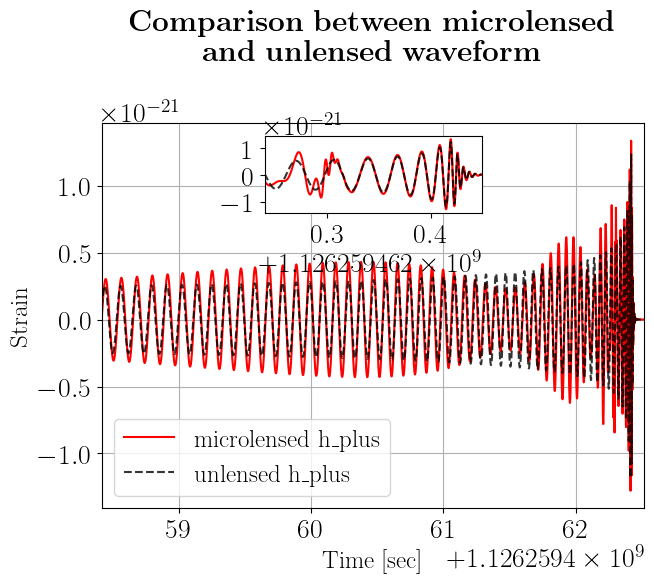

In [36]:
# Plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Main plot
wf = wfs_res["pure_polarized_wfs"]["hp"]
plt.plot(wf.sample_times, wf, color='red', linestyle='solid', label='microlensed h_plus')
wf = ul_wfs_res["pure_polarized_wfs"]["hp"]
plt.plot(wf.sample_times, wf, color='black', linestyle='--', label='unlensed h_plus', alpha=0.8)

plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="lower left")
plt.title("$\mathbf{Comparison~between~microlensed}$\n$\mathbf{~and~unlensed~waveform}$\n")
plt.grid()
plt.xlim(params["trigger_time"]-4, params["trigger_time"]+0.1)
# plt.xlim(-2, 0.05)

# Create inset axes
ax_inset = inset_axes(plt.gca(), width="40%", height="20%", loc='upper center')  # Adjust width and height as needed
# Inset plot
wf_inset = wfs_res["pure_polarized_wfs"]["hp"]  # Adjust this if you want to plot something else in the inset
ax_inset.plot(wf_inset.sample_times, wf_inset, color='red', linestyle='solid')
wf_inset = ul_wfs_res["pure_polarized_wfs"]["hp"]  # Adjust this if you want to plot something else in the inset
ax_inset.plot(wf_inset.sample_times, wf_inset, color='black', linestyle='--', alpha=0.8)
# Set limits for inset plot
plt.xlim(params["trigger_time"]-0.18, params["trigger_time"]+0.03)
plt.show()

### (ii) Zero-noise interferometer signal (`pure_ifo_signal`)

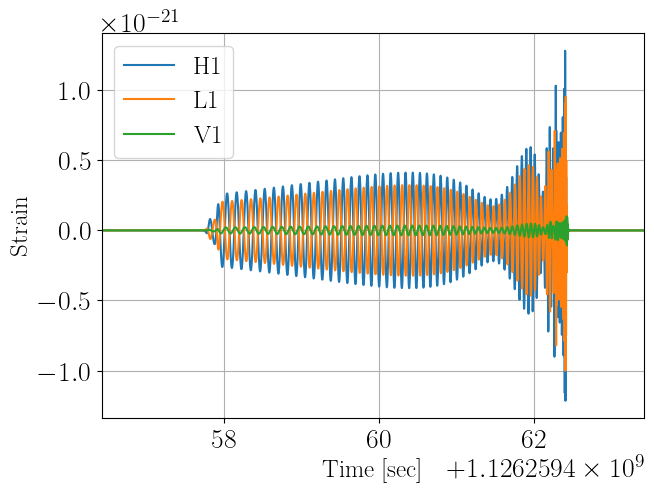

In [37]:
for ifo in params["ifo_list"]:
    wf = wfs_res["pure_ifo_signal"][ifo]
    plt.plot(wf.sample_times, wf, linestyle='-', label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Strain')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
plt.show()

### (iii) Signal with Noise

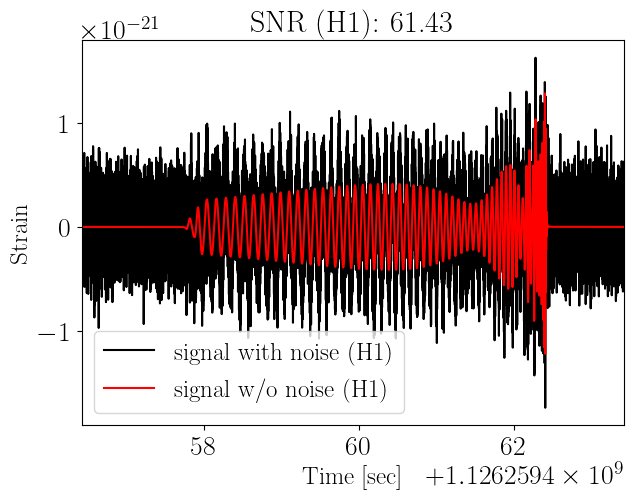

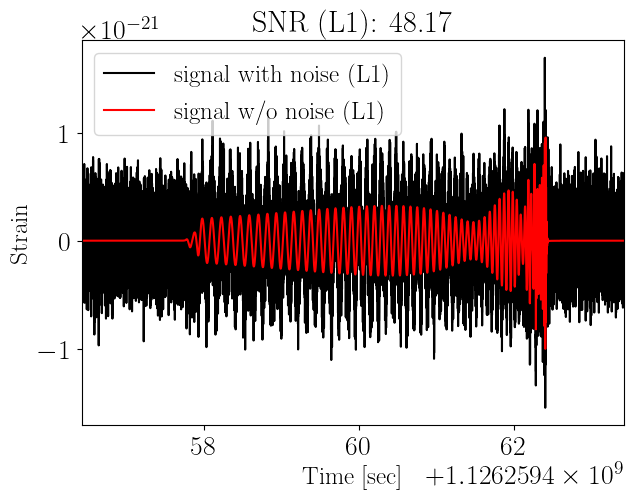

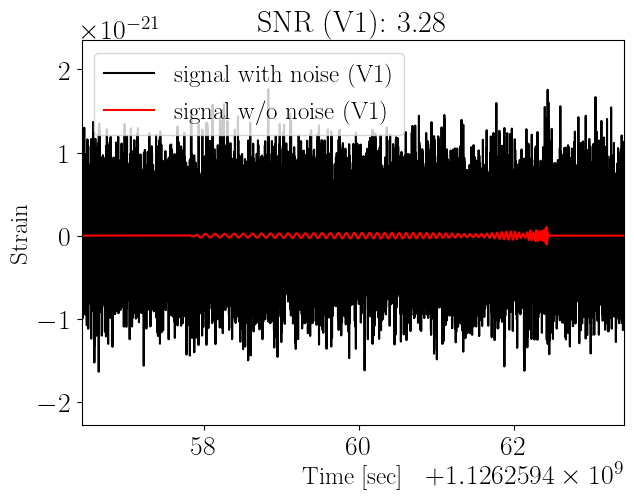

Net SNR: 78.13


In [38]:
for ifo in params['ifo_list']:
    wf_with_noise = wfs_res['noisy_ifo_signal'][ifo]
    wf_without_noise = wfs_res['pure_ifo_signal'][ifo] 
    snr_ifo = wfs_res['optimal_snr'][ifo] 

    plt.plot(wf_with_noise.sample_times, wf_with_noise, color='black', linestyle='solid', label='signal with noise ('+ifo+')')
    plt.plot(wf_without_noise.sample_times, wf_without_noise, color='red', linestyle='solid', label='signal w/o noise ('+ifo+')')   
    plt.title('SNR ('+ifo+'): {:.2f}'.format(snr_ifo))
    plt.xlabel('Time [sec]')
    plt.ylabel('Strain')
    plt.legend()
    plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
    plt.show()

net_SNR = wfs_res['network_optimal_snr']
print('Net SNR: {:.2f}'.format(net_SNR))

### (iv) Matched Filter SNR

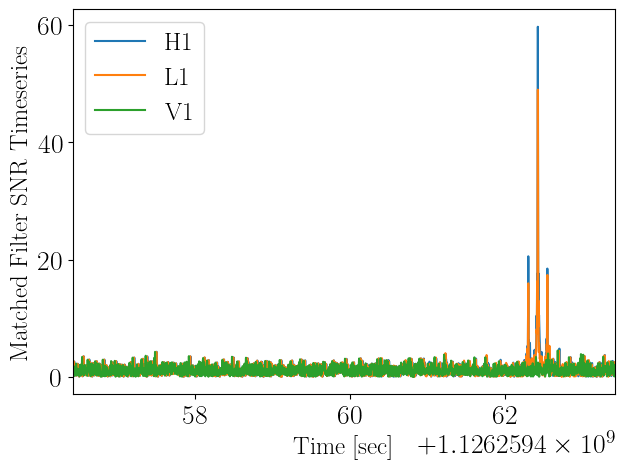

In [39]:
for ifo in params['ifo_list']:
    wf = wfs_res['matched_filter_snr_timeseries'][ifo]
    plt.plot(wf.sample_times, np.abs(wf), label=ifo)
plt.xlabel('Time [sec]')
plt.ylabel('Matched Filter SNR Timeseries')    
plt.legend()    
plt.xlim(params["trigger_time"]-6, params["trigger_time"]+1)
plt.show()    